In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('saleschannel.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 4)

Here, we have 200 rows and 4 columns.

In [6]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Here, we have float type values in all the columns.

# To check missing values 

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Here, there are no missing values.

<AxesSubplot:>

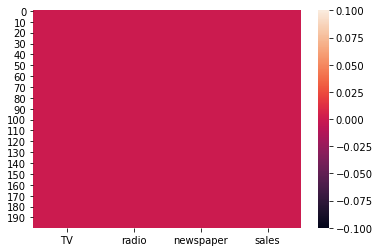

In [8]:
sns.heatmap(df.isnull())

# Summary Statistics

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


1. The mean is higher than median in radio, newspaper and sales columns where as median is higher than mean in TV column.

2. There is a large differnce in 75th percentile and max in newspaper column.

# To check correlation

In [10]:
dfcorr=df.corr()
dfcorr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

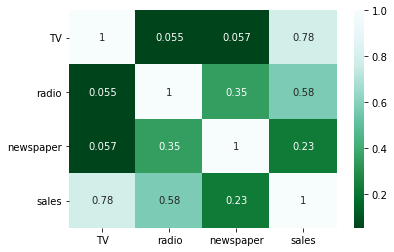

In [11]:
sns.heatmap(dfcorr,cmap='BuGn_r',annot=True)

Here, TV and sales columns are highly positively corrleated.

# EDA

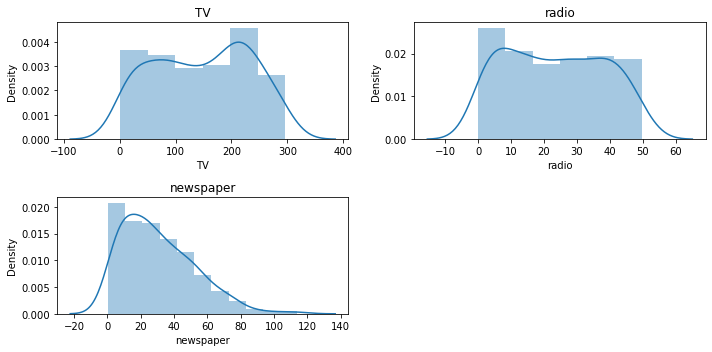

In [12]:
k=['TV','radio','newspaper']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.distplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

Dats are normally distributed in first two columns where as there is some skewness present in newspaper column.

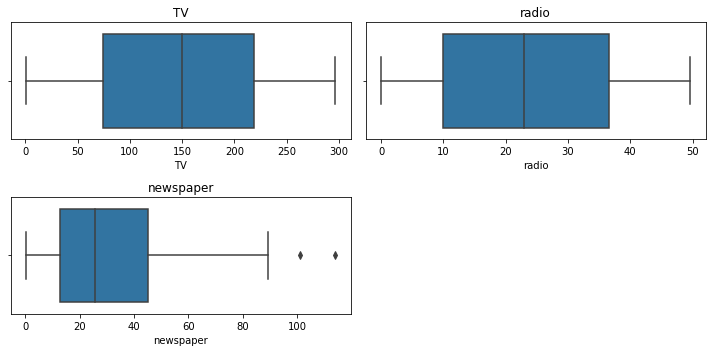

In [13]:
k=['TV','radio','newspaper']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

There are outliers present in newspaper column.

In [14]:
y=df[['sales']]

In [15]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [16]:
df.drop('sales',axis=1,inplace=True)

In [17]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

There is a little bit of skewness present in newspaper column.

In [18]:
df_new=df.copy(deep=True)

In [19]:
for col in df_new.columns:
    percentiles = df_new[col].quantile([0.01, 0.99]).values
    df_new[col][df_new[col] <= percentiles[0]] = percentiles[0]
    df_new[col][df_new[col] >= percentiles[1]] = percentiles[1]

In [20]:
df_new.skew()

TV          -0.069600
radio        0.094568
newspaper    0.720355
dtype: float64

There is still some skewness present in newspaper column. Lets remove that skewness as well.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

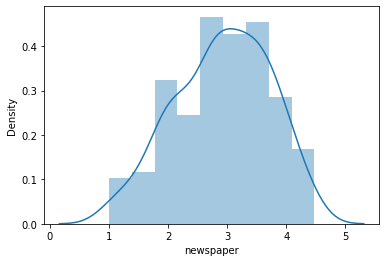

In [21]:
# By applying cbrt transform, I have removed the skewness.
df_new['newspaper']=np.cbrt(df_new['newspaper'])
sns.distplot(df_new['newspaper'])

In [22]:
df_new.skew()

TV          -0.069600
radio        0.094568
newspaper   -0.274471
dtype: float64

Now, there is no skewness present in any of the three columns.

In [23]:
#outlier analysis
for column_name in df_new.columns:
    q1 = df_new[column_name].quantile(0.25)
    q3 = df_new[column_name].quantile(0.75)
    iqr = q3-q1
    upper = q3 +1.5*iqr
    lower = q1 -1.5*iqr
    outliner_df = df_new.loc[(df_new[column_name] < lower)| (df_new[column_name] > upper)]
    print('Percentage of outlier in {0} is {1}'.format(column_name, outliner_df.shape[0]/df_new.shape[0]))

Percentage of outlier in TV is 0.0
Percentage of outlier in radio is 0.0
Percentage of outlier in newspaper is 0.0


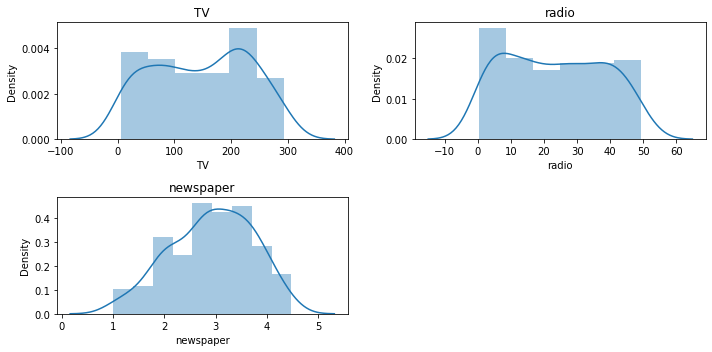

In [24]:
k=['TV','radio','newspaper']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.distplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout() 

Tha datas are normally distributed in this columns.

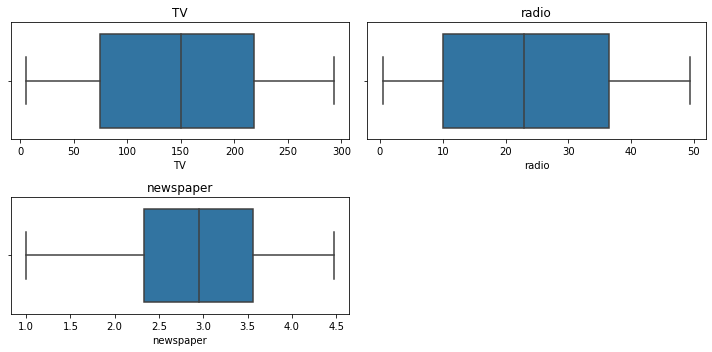

In [25]:
k=['TV','radio','newspaper']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.boxplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout() 

There are no outliers present in this columns.

In [26]:
df_new

,TV,radio,newspaper
0,230.1,37.8,4.105525
1,44.5,39.3,3.559526
2,17.2,45.9,4.107502
3,151.5,41.3,3.881968
4,180.8,10.8,3.879755
...,...,...,...
195,38.2,3.7,2.398610
196,94.2,4.9,2.008299
197,177.0,9.3,1.856636
198,283.6,42.0,4.045318


In [27]:
df_new['sales']=y['sales']

In [28]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,4.105525,22.1
1,44.5,39.3,3.559526,10.4
2,17.2,45.9,4.107502,9.3
3,151.5,41.3,3.881968,18.5
4,180.8,10.8,3.879755,12.9
...,...,...,...,...
195,38.2,3.7,2.398610,7.6
196,94.2,4.9,2.008299,9.7
197,177.0,9.3,1.856636,12.8
198,283.6,42.0,4.045318,25.5


<AxesSubplot:xlabel='TV', ylabel='sales'>

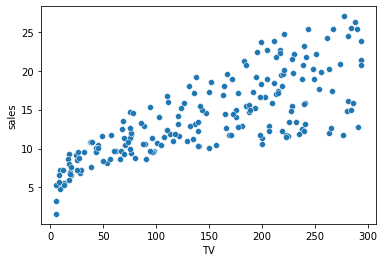

In [29]:
sns.scatterplot(df_new['TV'],df_new['sales'])

Thses are positively correlated

<AxesSubplot:xlabel='radio', ylabel='TV'>

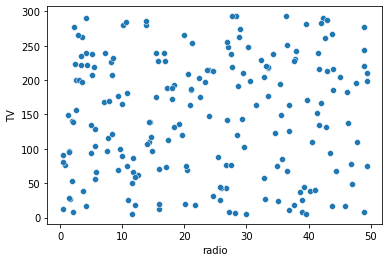

In [30]:
sns.scatterplot(df_new['radio'],df_new['TV'])

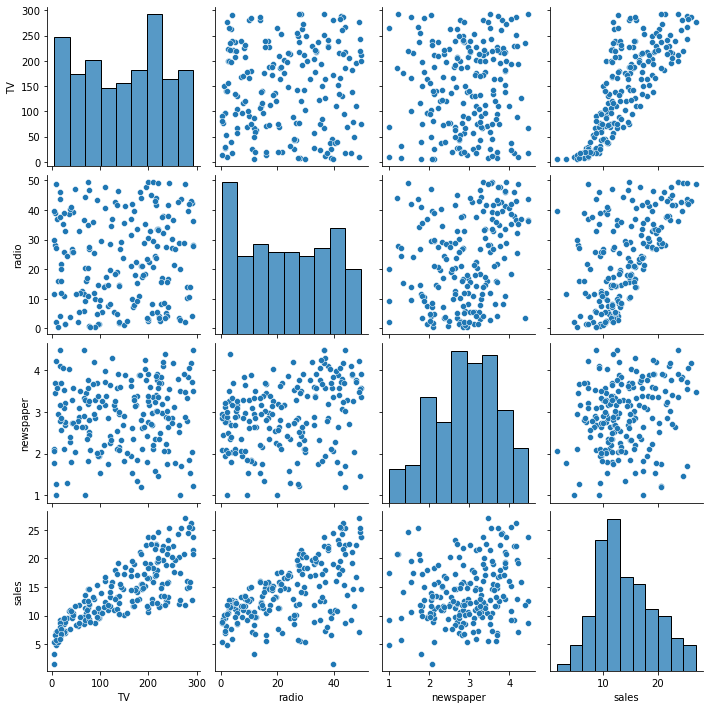

In [31]:
sns.pairplot(df_new)

In [32]:
df1=df_new
df1

,TV,radio,newspaper,sales
0,230.1,37.8,4.105525,22.1
1,44.5,39.3,3.559526,10.4
2,17.2,45.9,4.107502,9.3
3,151.5,41.3,3.881968,18.5
4,180.8,10.8,3.879755,12.9
...,...,...,...,...
195,38.2,3.7,2.398610,7.6
196,94.2,4.9,2.008299,9.7
197,177.0,9.3,1.856636,12.8
198,283.6,42.0,4.045318,25.5


In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[9.70724505e-01, 9.81796134e-01, 1.47877114e+00, 1.55205313e+00],
       [1.19868660e+00, 1.08312010e+00, 7.97975487e-01, 6.96046111e-01],
       [1.51778640e+00, 1.52894555e+00, 1.48123580e+00, 9.07405869e-01],
       [5.19976048e-02, 1.21821872e+00, 1.20002223e+00, 8.60330287e-01],
       [3.94474681e-01, 8.42035259e-01, 1.19726263e+00, 2.15683025e-01],
       [1.61713982e+00, 1.73159348e+00, 1.61797088e+00, 1.31091086e+00],
       [1.04673431e+00, 6.44049580e-01, 6.88548767e-02, 4.27042783e-01],
       [3.13856746e-01, 2.47601323e-01, 8.17762505e-01, 1.58039455e-01],
       [1.61830868e+00, 1.42971426e+00, 2.39344905e+00, 1.77205942e+00],
       [6.16558791e-01, 1.39593961e+00, 1.89393548e-01, 6.57617064e-01],
       [9.46212029e-01, 1.17978181e+00, 3.37398069e-02, 1.04190753e+00],
       [7.90719489e-01, 4.96156443e-02, 1.66102982e+00, 6.48970529e-01],
       [1.44064139e+00, 7.99412995e-01, 1.39606924e+00, 9.26620392e-01],
       [5.79188815e-01, 1.05819305e+00, 1.23262928e

In [34]:
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [35]:
df2=df1[(z<3).all(axis=1)]
df2

,TV,radio,newspaper,sales
0,230.1,37.8,4.105525,22.1
1,44.5,39.3,3.559526,10.4
2,17.2,45.9,4.107502,9.3
3,151.5,41.3,3.881968,18.5
4,180.8,10.8,3.879755,12.9
...,...,...,...,...
195,38.2,3.7,2.398610,7.6
196,94.2,4.9,2.008299,9.7
197,177.0,9.3,1.856636,12.8
198,283.6,42.0,4.045318,25.5


There are no outliers present in the columns.

In [36]:
x=df1.iloc[:,0:3]
y=df1.iloc[:,3]

In [37]:
x

,TV,radio,newspaper
0,230.1,37.8,4.105525
1,44.5,39.3,3.559526
2,17.2,45.9,4.107502
3,151.5,41.3,3.881968
4,180.8,10.8,3.879755
...,...,...,...
195,38.2,3.7,2.398610
196,94.2,4.9,2.008299
197,177.0,9.3,1.856636
198,283.6,42.0,4.045318


In [38]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [39]:
x.shape

(200, 3)

In [40]:
y.shape

(200,)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=45)

In [43]:
x_train.shape

(130, 3)

In [44]:
x_test.shape

(70, 3)

In [45]:
y_train.shape

(130,)

In [46]:
y_test.shape

(70,)

In [47]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
pred=lm.predict(x_test)
print('predicted sales',pred)
print('Actual sales',y_test)

predicted sales [15.11119405 10.09112535 16.37318711 21.69015363 15.88558659  8.93739082
 18.04192198 11.26491848 17.29560439  8.51727377 11.33880815  9.61100387
 12.13034682 19.35420543 16.90215692  6.41026022 14.18521248  7.64687239
 21.03362367 12.34369494 19.16781153  7.40988103 17.43699421 10.08122797
 17.10464353  6.93674077 20.53105517 12.1659301  14.98648743 14.2283587
 23.11813492 20.33964338 19.98820409 16.55860262  9.87179654  9.97005828
 16.75701693 18.35805536 13.1033582  19.50809318 15.36888994 14.01027393
  9.54953883 12.1371594  24.710657   11.94818965 13.79446842  8.91256774
 22.77452401 14.05320824 24.00818104 18.63296354 20.07767885 13.53748685
  9.59880443  9.65902532  9.72243565 19.10139152 20.66960516 17.08997025
 17.46345877 16.58036843  4.36560254 12.54511365 10.15558963 19.86497352
 13.20977786  7.71398143 14.94532501 10.52384508]
Actual sales 45     14.9
72      8.8
40     16.6
58     23.8
25     12.0
       ... 
139    20.7
161    13.3
34      9.5
114    14.6

In [49]:
lm.intercept_

3.2894551113315647

In [50]:
lm.coef_

array([ 0.04741713,  0.18301599, -0.18962186])

In [51]:
lm.score(x_train,y_train)

0.8876186912321851

In [52]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

2.1861748497483244
1.0980954002404812
Root Mean squared error: 1.4785718953599531


In [53]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9059156508728127

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [55]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [56]:
pred=dtr.predict(x_test)
print('Predicted sales',pred)
print('Actual sales',y_test)

Predicted sales [14.4  9.5 14.9 23.7 12.7 10.4 17.2 12.  17.2  7.  10.4 11.8 12.6 15.6
 15.9  8.4 15.6  9.7 21.8 10.9 20.1  6.6 12.3 10.6 18.4  9.3 20.1 12.6
 18.  14.4 24.7 22.6 17.4 18.  12.6 11.3 19.6 15.6 14.4 15.5 14.6 11.7
 11.8 15.6 25.4 14.4 14.7 11.4 25.4 14.7 25.5 15.5 18.  11.4 11.8 12.6
 10.3 15.6 21.8 15.2 17.4 15.6  6.6 12.5 11.  22.6 12.9  9.6 14.7 12.4]
Actual sales 45     14.9
72      8.8
40     16.6
58     23.8
25     12.0
       ... 
139    20.7
161    13.3
34      9.5
114    14.6
94     11.5
Name: sales, Length: 70, dtype: float64


In [57]:
r2_score(y_test,pred)

0.9290150952049838

In [58]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

1.6494285714285721
0.9942857142857144
Root Mean squared error: 1.2843008103355584


In [59]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.8194689368346373

In [60]:
pred=svr.predict(x_test)
print('Predicted sales',pred)
print('Actual sales',y_test)

Predicted sales [15.83043754  8.49635218 16.63421223 19.35173343 15.97568955 10.90812417
 17.40570032 11.13001451 16.74763389  8.02287162  9.3904296   9.07810572
 13.99284872 17.4502968  16.73615234  8.53827598 15.10655413  9.09533419
 19.00289531  9.69858158 18.12711744  7.50139678 16.28063674 12.73777251
 16.97341907  9.06959877 18.46657883 14.1287735  15.21414717 15.28504085
 19.6775307  18.67768722 17.97673192 16.13148824 12.17805604 10.58837185
 15.8610743  16.76358596 14.79436278 17.94172592 15.99470905 15.17340497
  8.98521841 13.60008306 19.5210066  13.57752852 10.64474065  9.99684582
 19.23831728 11.88464317 19.03280891 17.4734713  18.20948877 14.96227598
  9.03970887 11.87093777 12.41236643 17.02431714 18.86751665 17.07708566
 17.13107566 16.63630874  7.03536615 11.66395804 12.45783254 18.24294829
 12.44548683 10.33554841 12.75114125 11.97277597]
Actual sales 45     14.9
72      8.8
40     16.6
58     23.8
25     12.0
       ... 
139    20.7
161    13.3
34      9.5
114    14.

In [61]:
r2_score(y_test,pred)

0.7811724479834417

In [62]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

5.084748899138128
1.6202197580103064
Root Mean squared error: 2.2549387794656703


In [63]:
svr1=SVR(kernel='linear')
svr1.fit(x_train,y_train)
svr1.score(x_train,y_train)

0.8742733325379702

In [64]:
pred=svr1.predict(x_test)
print('Predicted sales',pred)
print('Actual sales',y_test)

Predicted sales [15.39614988 11.14712037 16.52617937 22.12396395 15.49463349  9.29814671
 18.55578291 12.02935157 17.97616171  9.5866029  12.54926114 10.50834396
 12.19135242 18.9574684  16.78943422  7.0671997  14.1995879   8.40001305
 21.34207174 13.33712092 19.40413889  8.34556186 16.85307246 10.22417698
 17.32749739  7.52654889 20.50017797 12.32362454 15.41331013 14.59380087
 23.41292839 20.6314551  19.79590722 16.96997505 10.30865907 10.70791716
 17.46655464 17.85741253 13.30657428 19.46101065 15.55368533 13.77577125
 10.45559696 12.40061788 24.83728517 12.29080524 14.83686306  9.6512086
 22.94033929 15.10223357 24.08988803 18.5256626  20.05522994 13.43125453
 10.56908854 10.02834085  9.93236532 18.59703881 21.00721745 17.26890504
 17.50662268 16.58126822  5.07688729 13.50480167 10.32956904 20.13639288
 14.11943778  8.01641722 15.96975085 10.93826416]
Actual sales 45     14.9
72      8.8
40     16.6
58     23.8
25     12.0
       ... 
139    20.7
161    13.3
34      9.5
114    14.6

In [65]:
r2_score(y_test,pred)

0.9194730786734571

In [66]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

1.8711500027891304
1.0403921478011156
Root Mean squared error: 1.3678998511547291


In [67]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.963825375251799

In [68]:
pred=knn.predict(x_test)
print('Predicted sales',pred)
print('Actual sales',y_test)

Predicted sales [14.92  9.42 17.5  23.2  13.54 10.36 18.56 11.92 18.18  8.36  9.9  10.2
 13.   16.92 14.1   9.04 13.88  9.04 21.88  9.9  20.32  6.62 16.96 11.52
 16.98  9.6  21.02 13.   14.68 14.94 21.68 21.26 19.8  16.44 12.08 10.76
 16.34 16.96 14.48 19.8  14.96 12.46 10.2  13.3  24.3  13.3  11.02 10.22
 22.08 12.46 24.1  18.08 21.26 11.76 10.2  11.96 11.58 16.96 21.88 18.66
 18.66 16.66  6.94 12.68 11.86 20.72 13.48  9.82 13.48 11.46]
Actual sales 45     14.9
72      8.8
40     16.6
58     23.8
25     12.0
       ... 
139    20.7
161    13.3
34      9.5
114    14.6
94     11.5
Name: sales, Length: 70, dtype: float64


In [69]:
r2_score(y_test,pred)

0.9416822057578558

In [70]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

1.3550914285714284
0.8574285714285717
Root Mean squared error: 1.1640839439539694


The scores can be because of overfitting. Lets check with cross validation.

# Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.mean())

[0.87794127 0.91727665 0.92974124 0.8132857  0.89534992]
0.8867189551455242


In [72]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())

[0.96511265 0.94988827 0.93946007 0.95807386 0.96639077]
0.9557851231708587


In [73]:
score=cross_val_score(svr,x,y,cv=5)
print(score)
print(score.mean())

[0.84816642 0.87378595 0.81953129 0.84336919 0.78014177]
0.8329989231564319


In [74]:
score=cross_val_score(svr1,x,y,cv=5)
print(score)
print(score.mean())

[0.86911485 0.92033895 0.94527731 0.76638912 0.89734072]
0.8796921906123639


In [75]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.95785352 0.9648751  0.96942198 0.93520667 0.94148362]
0.9537681795353301


The least difference between the highest accuracy score and cv says that decision tree regressor model is performing better.

# Hyper Prameter Tuning

We use this technique to improve the accuracy of the best model that we have choosen.

In [80]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','friedman_mse','mae','poisson'],
           'splitter':['best','random'],
            'max_depth':range(2,20,2),
            'min_samples_split':range(2,10,1),
            'min_samples_leaf':range(1,10,1),
            'max_features':['auto','sqrt','log2']}
gs=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [81]:
print(gs.best_params_)

{'criterion': 'mse', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [83]:
dtrmodel=DecisionTreeRegressor(criterion='mse',max_depth=14,max_features='auto',min_samples_leaf=1,min_samples_split=2,splitter='random')
dtrmodel.fit(x_train,y_train)
score=dtrmodel.score(x_train,y_train)
print(score)

1.0


# Saving the model

In [84]:
import joblib
joblib.dump(dtrmodel,'dtrmodel.obj')

['dtrmodel.obj']